In [1]:
import os
import copy
import pickle
import numpy as np
import glob

# matplotlib
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# astropy
from astropy.io import fits
from astropy.nddata import Cutout2D
from astropy.utils.data import download_file
from astropy.coordinates import SkyCoord, Angle
from astropy import wcs
from astropy.table import Table,vstack
import astropy.units as u
import matplotlib.pyplot as plt 

import sncosmo

import sys
# so can find module one dir back; don't need to explicitly put .py into each subfolder 
sys.path.append("../..")
from candels_galaxy_surveys import galaxy_catalog,galaxy_survey
import update_galaxy_survey

# so can find script for host ellipses 
sys.path.append("../../visualize_hosts/")
from sn_cutout import ellipse

In [2]:
candels = pickle.load(open('delz_candels.pkl','rb'))

In [6]:
GSD11Was = candels[-7]

delz = GSD11Was[0]
nearby = GSD11Was[1][1]
host = GSD11Was[1][2]
lc = GSD11Was[1][3]

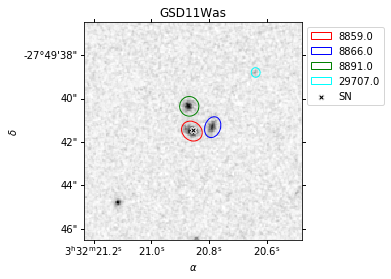

In [9]:
nick = GSD11Was[1][0]['name'] 
# the SN skycoord location
sn_loc = SkyCoord(GSD11Was[1][0]['RA'],GSD11Was[1][0]['DEC'],unit = (u.hourangle,u.deg))


# updating the surveys
update_near = update_galaxy_survey.update_survey(nearby)
update_host = update_galaxy_survey.update_survey(host[0])

# renaming for clarity
nearby = update_near
host = [update_host,host[1],host[2]]

# getting list of the ids, elliptical parameters for each nearby for this SN
ids = [i for i in nearby.mass[nearby.ids]]
nearby_coords = [i for i in nearby.gal_skycoords()]
a_ellipse = [np.float(i) for i in nearby.photom[nearby.a_ellip]]
b_ellipse = [np.float(i) for i in nearby.photom[nearby.b_ellip]]
theta_ellipse = [np.float(i) for i in nearby.photom[nearby.theta_ellip]]
gal_sources = [nearby.source]*len(nearby.photom)

# 5 element list, each element another x element list for a given SN with the x candidate parameters.
possible_hosts = [nearby_coords, a_ellipse, b_ellipse, theta_ellipse,ids,gal_sources]

# the ellipse 2nd argument wants a list with the x candidate parameters all together 
# ie not [[all coords], [all a], [all b], [all theta]] rather [[coords,a,b,theta],...]
possible_hosts = list(zip(possible_hosts[0],possible_hosts[1],possible_hosts[2],possible_hosts[3],possible_hosts[4],possible_hosts[5]))

ellipse(nick.lower()+'10x10.fits',possible_hosts,sn_loc,title=nick,save=False,show=True,diverging=False,logscale=False,val_min = -.0058,val_max = .0325 )

In [11]:
from astropy.table import hstack
hstack([nearby.mass[nearby.ids,nearby.redshift_names],nearby.mass[nearby.zspec,nearby.zphot,nearby.dz_l95,nearby.dz_u95]])

Seq,zbest,zspec,zphot,zphot_l95,zphot_u95
float64,float64,float64,float64,float64,float64
8859.0,0.851,-99.0,0.851,0.69,1.04
8866.0,1.35,-99.0,1.35,1.15,1.59
8891.0,0.596,-99.0,0.596,0.42,0.77
29707.0,2.158,-99.0,2.158,0.48,3.47


In [13]:
host[0].mass

Seq,RAdeg,DECdeg,Hmag,H_SNR,PhotFlag,StarFlag,Class_star,AGNFlag,zbest,zspec,q_zspec,r_zspec,zphot,zphot_l68,zphot_u68,zphot_l95,zphot_u95,zAGN,M_med,s_med,M_neb_med,s_neb_med,delta_Mz,M_2a_tau,M_2d_tau,M_6a_tau,M_10c,M_11a_tau,M_12a,M_13a_tau,M_14a,M_15a,M_6a_tau^NEB,M_6a_deltau,M_6a_invtau,M_10c^dust,M_12a_tau,M_14a_const,M_14a_lin,M_14a_deltau,M_14a_tau
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
8859.0,53.0869217,-27.8281918,25.25,24.95,0.0,0.0,0.09,0.0,0.851,-99.0,-99.0,-99.0,0.851,0.76,0.95,0.69,1.04,-99.0,230000000.0,20400000.0,245000000.0,35700000.0,0.405,8.38,7.36,8.34,8.23,8.35,8.38,8.43,8.32,8.33,8.45,8.35,8.4,8.23,8.35,8.32,8.28,8.32,8.33


## Published as Ia zspecSN ~ 1.33 

## The SN spectrum is good

## the host photz ~ 0.85 = [0.69,1.04] is close to evernote value zphot ~ 1.04 +- 0.3

## there is another nearer object with a zpeak ~ 1.35 which is in good agreement with the spec may want to update my host